# Lab 2 - DFT Problems

Spencer Y. Ki

Prof. D. Jones

PHY408H1S

Wednesday, the 8th of March, 2023.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fourier transform of Gaussian Functions (6 pts)
Collaborators: None

A common function used for the convolution of time series data is the Gaussian function

$$  g(t) = \frac{1}{\sqrt{\pi} t_H} e^{-(t/t_H)^2}, $$

where $t_H$ is the half duration.

 1. Plot $g(t)$ for $t_H = 5$ and $t_H = 15$ sec on the same graph with domain $[-50, 50]$ and $dt=10^{-3}$.

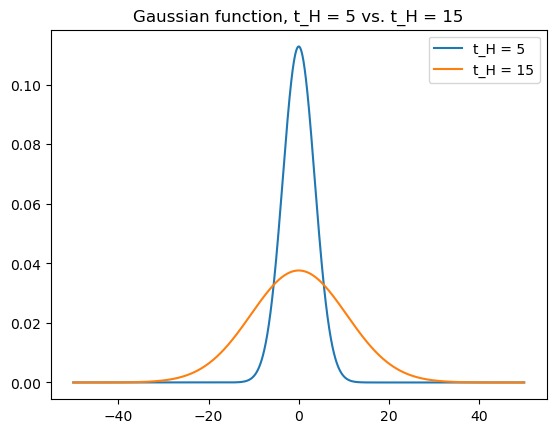

In [2]:
# Given parameters
th_1 = 5
th_2 = 15
dt = 1e-3
domain = np.arange(-50, 50, dt)

# Gaussian function
def gauss(t, th):
    return np.exp(-(t/th)**2)/(np.sqrt(np.pi)*th)

# Plot
plt.figure()
plt.plot(domain, gauss(domain, th_1), label = "t_H = 5")
plt.plot(domain, gauss(domain, th_2), label = "t_H = 15")
plt.title("Gaussian function, t_H = 5 vs. t_H = 15")
plt.legend()

 2. The analytical formula for the Fourier transform of $g(t)$ is

    $$ G(\omega) = e^\frac{-\omega^2 t_H^2}{4}. $$

    Compute the discrete Fourier transform (DFT) for both sampled $g(t)$ time series, and compare them to the analytical $G(\omega)$ for both $t_H$'s on the same graph.

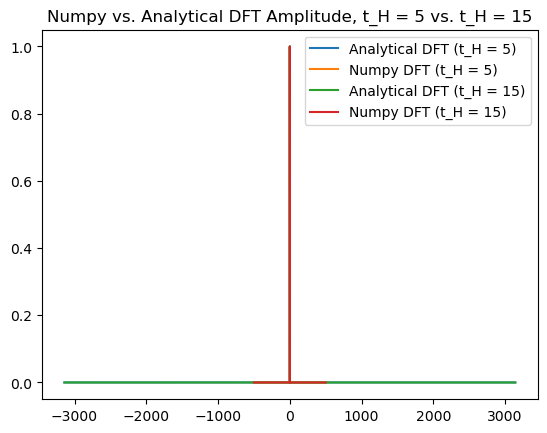

In [3]:
# Analytical Fourier transform of the Gaussian
def fourier_gauss(w, th):
    return np.exp(-(w**2)*(th**2)/4)

# Numpy DFT, t_H = 5
np_trans_1 = np.fft.fft(gauss(domain, th_1)) * dt
np_trans_1 = np.fft.fftshift(np_trans_1)
np_trans_1 = np.abs(np_trans_1)

# Numpy DFT, t_H = 15
np_trans_2 = np.fft.fft(gauss(domain, th_2)) * dt
np_trans_2 = np.fft.fftshift(np_trans_2)
np_trans_2 = np.abs(np_trans_2)

# Transforming axes
f_axis = np.fft.fftshift(np.fft.fftfreq(len(gauss(domain, th_1)), dt))
w_axis = 2*np.pi*f_axis

# Analytical DFTs, t_H = 5, 15
an_trans_1 = fourier_gauss(w_axis, th_1)
an_trans_2 = fourier_gauss(w_axis, th_2)

# Plots
plt.figure()
plt.plot(w_axis, an_trans_1, label = "Analytical DFT (t_H = 5)")
plt.plot(f_axis, np_trans_1, label = "Numpy DFT (t_H = 5)")
plt.plot(w_axis, an_trans_2, label = "Analytical DFT (t_H = 15)")
plt.plot(f_axis, np_trans_2, label = "Numpy DFT (t_H = 15)")
plt.title("Numpy vs. Analytical DFT Amplitude, t_H = 5 vs. t_H = 15")
plt.legend()

It can be difficult to see in the figure above that the amplitude of the DFT is functionally the same, no matter which method of calculation is used. To better demonstrate this, a plot of the above focused solely on the central 50 points has been included below:

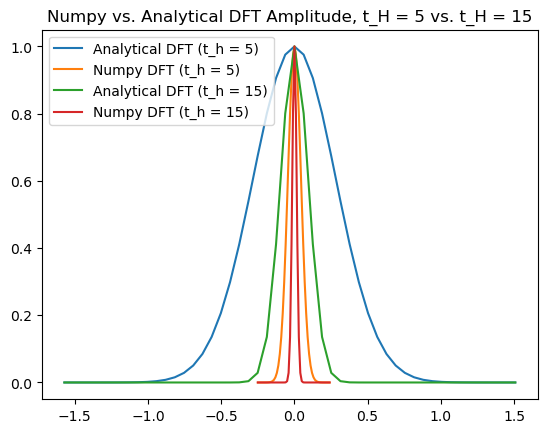

In [4]:
plt.figure()
plt.plot(w_axis[49975:50025], an_trans_1[49975:50025], label = "Analytical DFT (t_h = 5)")
plt.plot(f_axis[49975:50025], np_trans_1[49975:50025], label = "Numpy DFT (t_h = 5)")
plt.plot(w_axis[49975:50025], an_trans_2[49975:50025], label = "Analytical DFT (t_h = 15)")
plt.plot(f_axis[49975:50025], np_trans_2[49975:50025], label = "Numpy DFT (t_h = 15)")
plt.title("Numpy vs. Analytical DFT Amplitude, t_H = 5 vs. t_H = 15")
plt.legend()

 3. Comment on the effect of filtering a general input time function $f(t)$ by $g(t)$ (i.e. convolution of $f(t)$ with $g(t)$), and explain the difference in filtered output after applying Gaussian functions with $t_H = 5$ or $15$ secs.

Convolving or filtering a general input time function with a Gaussian function would result in smoothing — it would pick out the stronger, high-frequency components of the input function more than the low-frequency components. This smoothing effect would be greater with larger values of $t_{H}$. As can be seen in the comparison plot of Gaussian functions with $t_{H}$ values of 5 and 15, a larger $t_{H}$ results in a Gaussian with a greater standard deviation. This 'wider' curve would be able to then smooth the input functionover a longer time scale.

 4. Comment on how this is related to the time-frequency uncertainty principle (a signal cannot be infinitesimally sharp both in time and frequency).

As explained above, the width of the Gaussian function in time determines the degree to which the input function is spread out in time (i.e., its 'sharpness'). A Gaussian function with a smaller $t_{H}$ will result in a sharper signal in time, but this will come at the expense of greater spreading in frequency. Similarly, a Gaussian function with a larger $t_{H}$ will result in a more spread-out signal in time, but this will have the benefit of sharpening frequency.

# Fourier transform of Window Functions (6 pts)
Collaborators: None

A continuous time signal $f(t)$ can be truncated into a signal of finite length $T$ by window functions $b(t)$:

$$ g(t) = f(t) b(t) $$

Typical window functions include:

 * Boxcar function
    $$b(t) =
    \begin{cases}
    1 & 0 \leq t \leq T
    \\
    0 & \text{else}
    \end{cases}
    $$
 * Hann window
    $$b(t) =
    \begin{cases}
    \frac{1}{2} \left( 1 - \cos \frac{2 \pi t}{T} \right) & 0 \leq t \leq T
    \\
    0 & \text{else}
    \end{cases}
    $$

Now let $T = 10$ seconds, and sample both window functions by $\Delta t = 0.01$ seconds:

In [5]:
# Parameters and functions for the rest of the question
dt = 1e-2
domain = np.arange(-1, 11, dt)
boxcar = np.piecewise(domain, [(domain >= 0) & (domain <= 10)], [1, 0])
hann = np.piecewise(domain, [(domain >= 0) & (domain <= 10)], 
                    [lambda domain: 0.5*(1 - np.cos(2*np.pi*domain/10)), 0])

 1. Plot both window functions on the same graph.

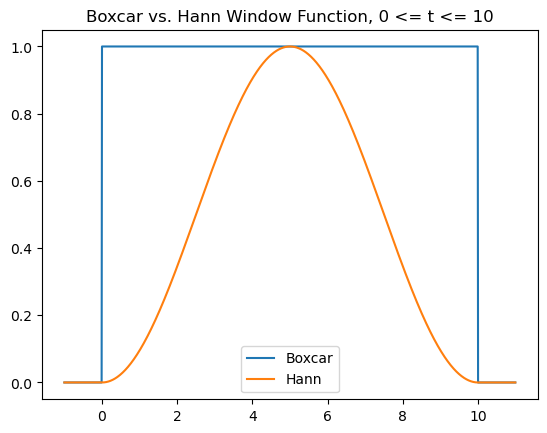

In [6]:
plt.figure()
plt.plot(domain, boxcar, label = "Boxcar")
plt.plot(domain, hann, label = "Hann")
plt.title("Boxcar vs. Hann Window Function, 0 <= t <= 10")
plt.legend()

2. Calculate the Fourier transform of both functions by numpy `fft()`. Pay extra attention to how you interpret the corresponding frequencies of output results from python.

In [7]:
# Boxcar Fourier transform
trans_box = np.fft.fft(boxcar) * dt
trans_box = np.fft.fftshift(trans_box)
trans_box = np.abs(trans_box)

# Hann window Fourier transform
trans_hann = np.fft.fft(hann) * dt
trans_hann = np.fft.fftshift(trans_hann)
trans_hann = np.abs(trans_hann)

# Appropriate axis
f_axis = np.fft.fftshift(np.fft.fftfreq(len(hann), dt))

 3. Plot the Fourier transform of both functions in the appropriate frequency range on the
    same graph.

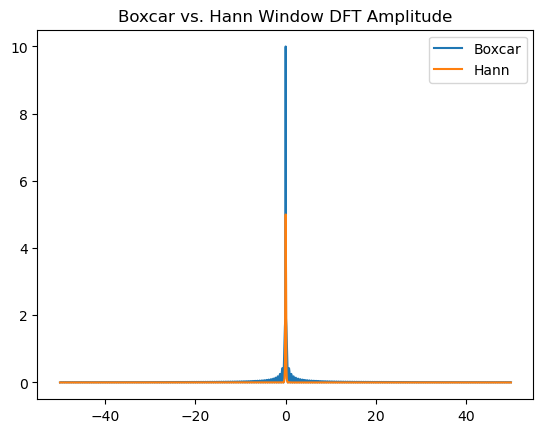

In [8]:
plt.figure()
plt.plot(f_axis, trans_box, label = "Boxcar")
plt.plot(f_axis, trans_hann, label = "Hann")
plt.title("Boxcar vs. Hann Window DFT Amplitude")
plt.legend()

It can be difficult to see in the figure above the differing amplitudes and spreads of the two DFTs. To better demonstrate this, a plot of the above focused solely on the central 50 points has been included below:

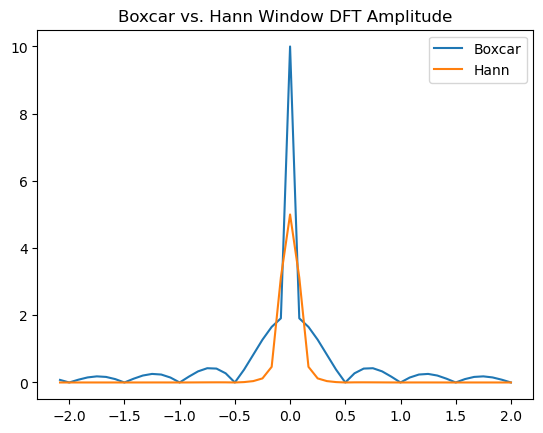

In [9]:
plt.figure()
plt.plot(f_axis[575:625], trans_box[575:625], label = "Boxcar")
plt.plot(f_axis[575:625], trans_hann[575:625], label = "Hann")
plt.title("Boxcar vs. Hann Window DFT Amplitude")
plt.legend()

 4. Based on the FTs, comment on the effect of truncating a continuous time series by either
    window on its frequency spectrum $G(\omega)$ compared to the original spectrum $F(\omega)$.

As can be seen in the plots above, the DFT of the Boxcar has a single high peak and multiple smaller peaks tapering out to the sides, approximating a sinc function. Conversely, the DFT of the Hann window is a solitary peak with a lower amplitude than the Boxcar, but no smaller peaks. Accordingly, truncating a continuous time series on the frequency spectrum with a Boxcar funnction may result in a loss of frequency sharpness, due to the trailing smaller peaks. Truncating with the Hann window would likely result in smoothing, given the resemblance it has to the Gaussian examined above.

 5. Speculate on the advantages and disadvantages of boxcar and Hann window functions for truncation.

The simplicity of the Boxcar function likely results in it being easy to implement and analyse, but that same simplicity may result in it being particularly sensitive to noise in the input signal (alongside the downsides mentioned in the previous question). As stated above, the Hann window is likely to sharpen frequencies well, but that would result in a trade-off in time sharpness due to the time-frequency uncertainty principle.

# Radial Distribution Function (12 pts)
Collaborators: None (math inspiration taken from Stack Exchange and Wikipedia: 
- https://math.stackexchange.com/questions/241469/fourier-transform-of-fourier-transform

- https://dsp.stackexchange.com/questions/23994/meaning-of-real-and-imaginary-part-of-fourier-transform-of-a-signal

- https://physics.stackexchange.com/questions/464239/assumptions-behind-ornstein-zernike-correlation-function

- https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem

)

**Background**

Liquids have no fixed internal structure. Yet they do have some short range order in the sense
that they have preferred intermolecular spacings, which are determined by the locations of minima
in the intermolecular potentials. The microscopic structure of liquids is often characterized by a
quantity known as the Radial Distribution Function $g(r)$, which is essentially the probability (Relative
to the average probability, which means that $g(r)$ tends to 1 at large $r$, where the neighbour is too far
away to feel any interaction.) that a molecule has a neighbouring molecule at distance $r$. Typically $g(r)$
shows a value that approaches zero at small $r$ since molecules cannot occupy the same space; it also shows a
peak at the preferred distance of nearest neighbours, and secondary peaks at preferred distances of more distant
neighbours. If a suitable collimated beam of particles (e.g. X-rays or neutrons) is sent through a
sample of the liquid, some of the particles are scattered. The number of particles scattered through
a given angle is related to the Fourier Transform of $g(r)$ evaluated at the wavenumber $k$
corresponding to the transverse momentum transfer associated with that scattering angle. Kittel derives
this relationship in Chapter 17 of Introduction to Solid State Physics.

If this all sounds complicated, all you need to know here is that something called the Structure
Factor $S(k)$ is effectively measured by looking at the scattered intensity as a function of
scattering transverse wavenumber $k$ (proportional to scattering angle), and that the Radial Distribution
Function is related to it by

$$ g(r) = 1 + \frac{1}{2 \pi^2 \rho r} \int_0^\infty k \left( S(k) - 1 \right) \sin(kr) dk $$

where $\rho$ is liquid number density (number of atoms per unit volume, computable from the three
constants mentioned in the introduction), $k$ is wavenumber, and $r$ is radius.

 1. You may have noticed some resemblance between expression (6) and the Fourier transform.
    First show that the integration part $\int_0^\infty k (S(k) - 1) \sin(kr) dk$
    can be rewritten as

    $$p(r) = \int_{-\infty}^\infty \frac{1}{2i} k \left( S(k) - 1 \right) e^{ikr} dk.$$

Straightforwardly, $sin(kr) = \frac{e^{ikx}-e^{-ikx}}{2i}$ by Euler's formula. Given that $S(k)$ is even, its product with $\frac{e^{ikx}-e^{-ikx}}{2i}$ would result in the whole integrand being odd. As the integrand is odd, the integral of the integrand from $-\infty$ to $\infty$ is zero.

 2. Now we can make some connections between the Radial Transfer Function and the Fourier
    Transform, if we substitute $r \rightarrow t$ and $k \rightarrow \omega$. What is the Fourier transform
    $P(k)$ of $p(r)$? Is $P(k)$ a real, imaginary or general complex function? Is it even or odd? How will these
    affect $p(r)$? Is that what you expect? Plot $P(k)$ as a function of $k$ ranging from $-15\mathrm{\mathring{A}}^{-1}$ to $15\mathrm{\mathring{A}}^{-1}$
    based on `argon.py` (i.e. import and use the variables defined there).

The function $p(r)$ already resembles a Fourier transform, so $P(k)$ would functionally be the Fourier transform of a Fourier transform. This allows one to identify that $P(k) = 2\pi(\frac{1}{2i} (-k) (S(-k) - 1)) = i\pi k(S(-k) - 1))$.

$S(k)$ is real and even, so when multiplied by $i\pi k$ yield an imaginary odd function. Accordigly, the amplitudes of the ouput must be considered to examine the Fourier transform in a physically meaningful way.

Text(0.5, 1.0, 'Amplitude of P(k)')

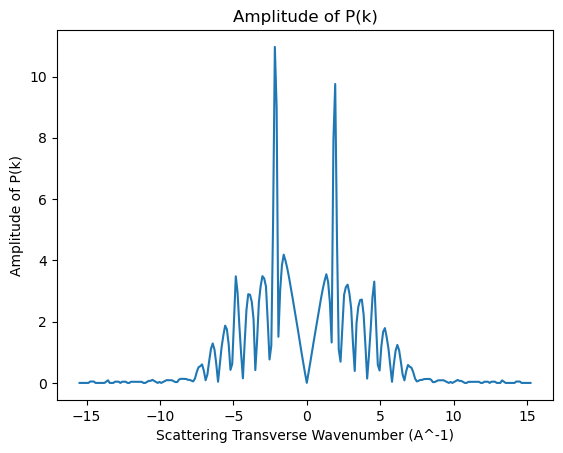

In [10]:
import argon as ar
sk = np.concatenate((np.flip(ar.YanData)[:-1], ar.YanData))
k_axis = np.linspace((-len(ar.YanData)-1)*ar.dk, (len(ar.YanData)-1)*ar.dk, len(sk))
ar_trans = np.abs(1j*np.pi*k_axis*(sk-1))
plt.figure()
plt.plot(k_axis, ar_trans)
plt.xlabel("Scattering Transverse Wavenumber (A^-1)")
plt.ylabel("Amplitude of P(k)")
plt.title("Amplitude of P(k)")

 3. Write a Python function `[gn, rn] = RDFcalc(S, dk, rho)` to calculate Radial Distribution
    Function $g(r)$ from Structure Factor $S(k)$ data, sampled at $dk$, and density $\rho$, and output
    the RDF vector $g_n$ and its corresponding radial distance vector $r_n$.

In [11]:
def RDFcalc(S, dk, rho):
    n = len(S)
    k = np.fft.fftfreq(n, dk)
    k[0] = dk
    
    Sk = np.fft.fft(S)
    gn = 1 + (1 / (2 * np.pi**2 * rho * k)) * np.imag(Sk / (1 + Sk))
    rn = np.linspace(0, (n-1) * dk / 2, n // 2 + 1)
    
    return gn[:n//2+1], rn

4. With the data provided in `argon.py`, compute the corresponding Radial Distribution Function
    $g(r)$. Plot your results for $r$ from $0$ to $30\mathrm{\mathring{A}}$;. Over what range of radius can you trust your
    result?

[1.         1.01493653 1.01466928 1.01407824 1.0132292  1.01192095
 1.009957   1.00673926 1.00109748 0.99357398 0.99360869 1.00274828
 1.00714121 1.00741598 1.00594401 1.0029023  0.99763859 0.98980268
 0.98725534 0.99971243 1.00654835 1.00718033 1.00553769 1.00244213
 0.9973307  0.98851889 0.98312774 1.00618145 1.01161587 1.0095786
 1.00627311 1.0021726  0.99613244 0.9829868  0.95607019 1.02641345
 1.01622044 1.0097357  1.00546685 1.00193032 0.99794398 0.99079178
 0.98755812 1.02968172 1.01341908 1.00822175 1.0055021  1.00316926
 1.00052513 0.99935276 1.00506086 1.00607577 1.00536914 1.00465566
 1.00229358 1.0004269  1.00152046 1.00332863 1.00321134 1.00343464
 1.00184612 0.99930073 0.99685439 0.99573479 1.        ] [0.        0.1190625 0.238125  0.3571875 0.47625   0.5953125 0.714375
 0.8334375 0.9525    1.0715625 1.190625  1.3096875 1.42875   1.5478125
 1.666875  1.7859375 1.905     2.0240625 2.143125  2.2621875 2.38125
 2.5003125 2.619375  2.7384375 2.8575    2.9765625 3.095625  3.2

Text(0.5, 1.0, 'Radial Distribution Function')

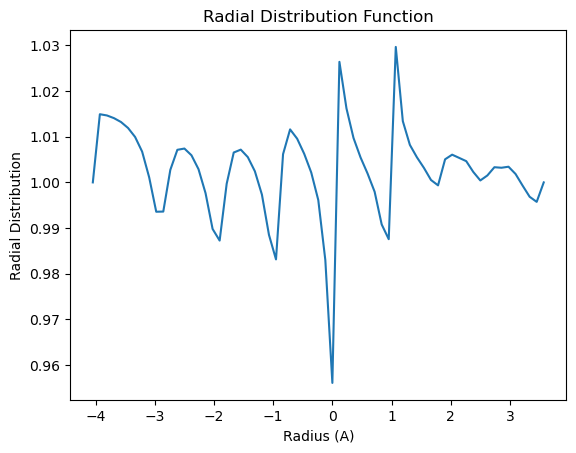

In [12]:
yan_gn, yan_rn = RDFcalc(ar.YanData, ar.dk, ar.massRho)

print(yan_gn, yan_rn)#Printing the output for inspection.

plt.figure()
#By inspection, g(r = 0) = 0 with a horizontal shift of 4.048125
plt.plot(yan_rn - 4.048125, yan_gn)
plt.xlabel('Radius (A)')
plt.ylabel('Radial Distribution')
plt.title("Radial Distribution Function")

From inspection of the above plot, it seems that a radius of roughly 1.5 angstroms can be trusted for the data provided in argon.py.

 5. From the $g(r)$ you computed, estimate the average molecular radius $R_a$ of liquid argon. Give
    your reasoning and state what accuracy you can justify for your estimation.

To estimate $R_{a}$, one should identify the first peak in the plot of the RDG, which corresponds to the likliest probability for the nearest-neighboring molecule.

By inspection of the data, one can see that the first positive peak occurs at $4.1671875 - 4.048125 = 0.1190625$ angstroms.This should be the distance between two molecules that are 'touching,' so dividing that by 2 should yield the molecular radius: $0.1190625/2=0.05953125$ angstroms.

This is a very rough estimate, hampered by factors including the accuracy of the argon.py data and its discrete nature.

 6. Now we explore the effect of sampling range. Yan sampled in wavenumber $k$ out to
    $k_{max} = 15.24\mathrm{\mathring{A}}^{-1}$, and he could have saved himself work by not collecting as much data,
    i.e., reducing $k_{max}$. But how much could he have reduced the sampling length $k_{max}$, while still
    seeing distinct peaks in the Radial Distribution Function? Also explain theoretically what you observe.

According to the Nyquist-Shannon sampling theorem, to accurately sample a signal one needs to sample it at a rate that is at least twice its highest frequency. Therefore, if Yan wants to see the first two peaks of the RDF, occuring at $𝑟_{1}$ and $𝑟_{2}$, he needs to sample at least at a rate of $2𝜋/𝑟_{2}$. To be safe, he should sample at a rate of $2𝜋/𝑟_{1}$, which would ensure that he sees both peaks clearly. If Yan reduces the sampling length 𝑘max too much, he will not be able to sample the signal accurately and could end up with distorted peaks or false peaks.

 7. To explore the effect of data sampling, let's assume Yan decided to save his work by sampling
    less often (i.e. increasing $dk$). How large a $dk$ can he use to be able to still recover the first
    two peaks clearly? State your answers and a theoretical justification for what you expect to
    see if you increase $dk$ too much.

If Yan samples the data less frequently (i.e., increases the value of 𝑑𝑘), he is essentially increasing the distance between the points at which he measures the data. As a result, he may miss some important features of the signal, such as the peaks in the RDF. As aforementioned, Nyquist-Shannon requires a sampling rate that is at least twice the signal's highest frequency.

If Yan increases his sampling distance too much, he will not be able to capture the fine details of the RDF, and the peaks will become broader and less pronounced. This is because the Fourier transform of the truncated signal will have less high-frequency components, which results in a loss of resolution.